In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
import time
import random
import os
from constant import Constants
import gc 
gc.enable()


In [2]:
#set problem 
file_name = "relay4"
planning_horizon = 3
num_iterations = 3
sota_ = False
game_type = "zerosum"


problem = DecPOMDP(file_name,horizon=planning_horizon)
Constants.initialize(problem)
constant = Constants.get_instance()
from pbvi import PBVI
from experimentFunctions import Experiment
experiment = Experiment(planning_horizon,problem)
print(f"game size :\n\t|S| = {len(problem.states)}")
print(f"\t|Z| = {problem.num_joint_observations}\n\t|U| = {problem.num_joint_actions} with |U_i| = {problem.num_actions[0]}")
print(f"intiial_belief : {problem.actions}")



game size :
	|S| = 4
	|Z| = 9
	|U| = 9 with |U_i| = 3
intiial_belief : [['shuffle', 'exchange', 'sense'], ['shuffle', 'exchange', 'sense']]


In [3]:
#see reward matrix of both player
print(f"REWARD MATRIX OF {game_type} {problem.name} GAME")
print("\nLeader :")
print(f"{pd.DataFrame(constant.REWARDS[game_type][0],columns=problem.states)}")
print("\nFollower :")
print(f"{pd.DataFrame(constant.REWARDS[game_type][1],columns=problem.states)}")



REWARD MATRIX OF zerosum relay4 GAME

Leader :
   l1_r1  l1_r2  l2_r1  l2_r2
0   -1.0   -1.0   -1.0   -1.0
1  -50.0  -50.0  -50.0  -50.0
2   -1.0   -1.0   -1.0   -1.0
3  -50.0  -50.0  -50.0  -50.0
4   50.0  -50.0  -50.0  -50.0
5  -50.0  -50.0  -50.0  -50.0
6   -1.0   -1.0   -1.0   -1.0
7  -50.0  -50.0  -50.0  -50.0
8   -1.0   -1.0   -1.0   -1.0

Follower :
   l1_r1  l1_r2  l2_r1  l2_r2
0    1.0    1.0    1.0    1.0
1   50.0   50.0   50.0   50.0
2    1.0    1.0    1.0    1.0
3   50.0   50.0   50.0   50.0
4  -50.0   50.0   50.0   50.0
5   50.0   50.0   50.0   50.0
6    1.0    1.0    1.0    1.0
7   50.0   50.0   50.0   50.0
8    1.0    1.0    1.0    1.0


In [4]:
values,times ,tabular_value= experiment.run_single_experiment(density=0.00001,gametype=game_type,limit=1000,sota=False,iterations=num_iterations)
values

			 Solving zerosum relay4 GAME WITH SOTA False 3 
	belief expansion done, belief space size = 60

iteration : 1
========================= backup at timestep 2 =========================== 

Game zerosum  ::  max plane LP value: (0.0, 0.0), tabular LP value : (0.0, 0.0)  --  Reconstructed Max plane alpha: (0.0, 0.0), reconstructed tabular alpha : (0.0, 0.0)  --  belief [0. 0. 0. 1.]  -- DR <decisionRule.DecisionRule object at 0x13429f8e0>

Game zerosum  ::  max plane LP value: (0.0, 0.0), tabular LP value : (0.0, 0.0)  --  Reconstructed Max plane alpha: (0.0, 0.0), reconstructed tabular alpha : (0.0, 0.0)  --  belief [0.25 0.25 0.25 0.25]  -- DR <decisionRule.DecisionRule object at 0x134549b40>

Game zerosum  ::  max plane LP value: (0.0, 0.0), tabular LP value : (0.0, 0.0)  --  Reconstructed Max plane alpha: (0.0, 0.0), reconstructed tabular alpha : (0.0, 0.0)  --  belief [0.  0.5 0.  0.5]  -- DR <decisionRule.DecisionRule object at 0x134593d60>

Game zerosum  ::  max plane LP value: (

[(-50.85878962536023, 50.85878962536023),
 (-50.85878962536023, 50.85878962536023),
 (-50.85878962536023, 50.85878962536023)]

In [5]:
database, matrix = experiment.run_experiments_decreasing_density(num_iterations,initial_density=0.001)
pd.DataFrame(database)

			 Solving cooperative relay4 GAME WITH SOTA False 1 
iteration : 1 , density = 0.25
	belief expansion done, belief space size = 4

========================= backup at timestep 0 =========================== 

Game cooperative  ::  max plane LP value: (0.0, 0.0), tabular LP value : (0.0, 0.0)  --  Reconstructed Max plane alpha: (0.0, 0.0), reconstructed tabular alpha : (0.0, 0.0)  --  belief [0. 0. 0. 1.]  -- DR <decisionRule.DecisionRule object at 0x134590070>

iteration : 2 , density = 0.1255
	belief expansion done, belief space size = 4

========================= backup at timestep 0 =========================== 

Game cooperative  ::  max plane LP value: (0.0, 0.0), tabular LP value : (0.0, 0.0)  --  Reconstructed Max plane alpha: (0.0, 0.0), reconstructed tabular alpha : (0.0, 0.0)  --  belief [0. 0. 0. 1.]  -- DR <decisionRule.DecisionRule object at 0x1346cb190>

iteration : 3 , density = 0.001
	belief expansion done, belief space size = 4

========================= backup at time

,gametype,SOTA,horizon,iterations,time,number_of_beliefs,values,tabular value,density
0,cooperative,Stackelberg,1,3,"[0.029877185821533203, 0.057389259338378906, 0...","[4, 4, 4]","[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]","[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]","[0.25, 0.1255, 0.001]"
1,cooperative,Stackelberg,2,3,"[0.16916799545288086, 0.30388784408569336, 0.4...","[9, 15, 17]","[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]","[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]","[0.25, 0.1255, 0.001]"
2,cooperative,Stackelberg,3,3,"[0.4018678665161133, 1.001262903213501, 1.6853...","[11, 21, 60]","[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]","[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]","[0.25, 0.1255, 0.001]"
3,cooperative,State of the Art,1,3,"[0.0019910335540771484, 0.0037598609924316406,...","[4, 4, 4]","[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]","[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]","[0.25, 0.1255, 0.001]"
4,cooperative,State of the Art,2,3,"[0.01026296615600586, 0.0206758975982666, 0.03...","[9, 15, 17]","[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]","[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]","[0.25, 0.1255, 0.001]"
5,cooperative,State of the Art,3,3,"[0.03398776054382324, 0.09691071510314941, 0.1...","[11, 21, 60]","[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]","[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]","[0.25, 0.1255, 0.001]"
6,zerosum,Stackelberg,1,3,"[0.029267072677612305, 0.05668210983276367, 0....","[4, 4, 4]","[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]","[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]","[0.25, 0.1255, 0.001]"
7,zerosum,Stackelberg,2,3,"[0.14586901664733887, 0.31457090377807617, 0.4...","[9, 15, 17]","[(-50.0, 50.0), (-50.0, 50.0), (-50.0, 50.0)]","[(-50.0, 50.0), (-50.0, 50.0), (-50.0, 50.0)]","[0.25, 0.1255, 0.001]"
8,zerosum,Stackelberg,3,3,"[0.46378183364868164, 1.1626038551330566, 1.90...","[11, 21, 60]","[(-50.85878962536023, 50.85878962536023), (-50...","[(-50.85878962536023, 50.85878962536023), (-50...","[0.25, 0.1255, 0.001]"
9,zerosum,State of the Art,1,3,"[0.04025888442993164, 0.08011698722839355, 0.1...","[4, 4, 4]","[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]","[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]","[0.25, 0.1255, 0.001]"


/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:150: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==self.planning_horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:150: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==self.planning_horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:150: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==self.planning_horizon]


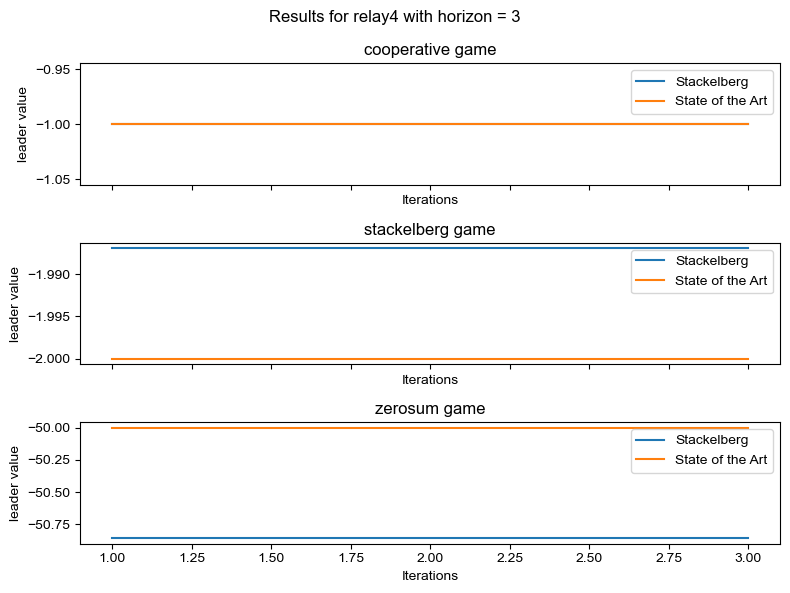

/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:127: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:127: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:127: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:127: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/Git

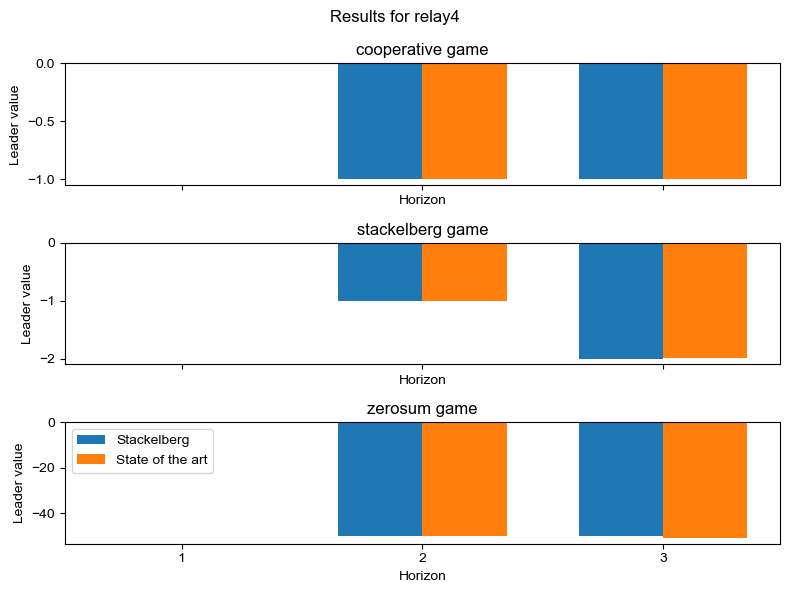

In [6]:
experiment.plots()
experiment.horizon_value_plot()

In [ ]:
experiment.generate_summary_table()